## Mashable - Shares' Prediction For Articles - Data Analysis

### Domain 

Social Media

### FOCUS

PREDICT NO.OF SHARES OF AN ARTICLE

### BUSINESS CHALLENGE/REQUIREMENT

Congratulations!!  for making it so far.  You now have a full fledge project to apply Machine Learning skills you have learned till Module 11.

Mashable (www.mashable.com) is a global, multi-platform media and entertainment company. Powered by its own proprietary technology, Mashable is the go-to source for tech, digital culture and entertainment content for its dedicated and influential audience around the globe.Just like any other media company its success depends on the popularity of articles.  And one of the key metrics to measure popularity is no. of shares done on article.Over period of few years Mashable has collected data on around 40,000 articles. 

You as ML expert have to do analysis and modeling to predict number of shares of an article given the input parameters.

### KEY ISSUES

Data contains large number of features
Prediction is of continuous value (shares) 

### CONSIDERATIONS

NONE

### DATA VOLUME

39797 records 

### File 

OnlineNewsPopularity.csv

### Fields in Data

0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (target)

### ADDITIONAL INFORMATION

NA

### BUSINESS BENEFITS

Mashable’s entire business is dependent on popularity of articles. With accurate prediction of shares, company can choose which articles to publish hence driving higher user engagement and profits.  Rough estimate is 1% increase in engagement time (minutes) increases profit by up to 5%. 

#### 1. Data Loading & Basic EDA

In [1]:
# import required libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
# load the data. 
df = pd.read_csv('OnlineNewsPopularity.csv')

In [3]:
# Check sample of the data. 
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
# Check the shape of the data. 
df.shape

(39644, 61)

The dataset overall is very big. It contains 2418284 items in total. Also, upfront, we can say that we would not need the URL field as it is too unique to be analyzed. 

In [5]:
# Drop the URL field. 
df.drop('url', axis=1, inplace=True)

In [6]:
# Checking the information. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
timedelta                         39644 non-null float64
n_tokens_title                    39644 non-null float64
n_tokens_content                  39644 non-null float64
n_unique_tokens                   39644 non-null float64
n_non_stop_words                  39644 non-null float64
n_non_stop_unique_tokens          39644 non-null float64
num_hrefs                         39644 non-null float64
num_self_hrefs                    39644 non-null float64
num_imgs                          39644 non-null float64
num_videos                        39644 non-null float64
average_token_length              39644 non-null float64
num_keywords                      39644 non-null float64
data_channel_is_lifestyle         39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus               39644 non-null float64
data_channel_is_socmed            39

Clearly, the data seems to be quite well balanced, and has no missing values. Further we can start looking into some basic exploration of the data, inclusive of pairplots and correlation matrix to understand the data more. 

In [7]:
# Getting list of all columns. 
df.columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       ' data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glo

In [8]:
# Create list of feature columns. 
features = ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       ' data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']

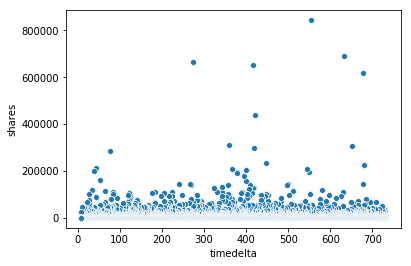

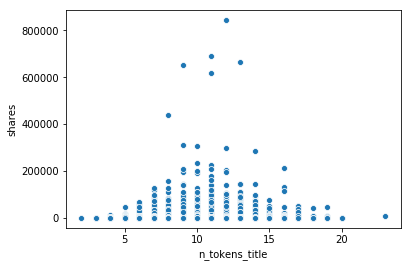

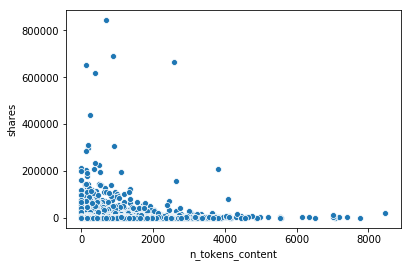

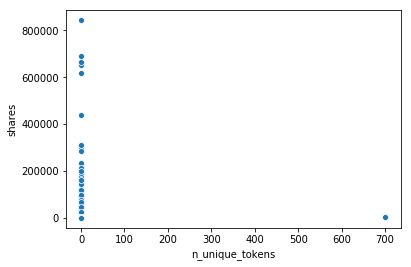

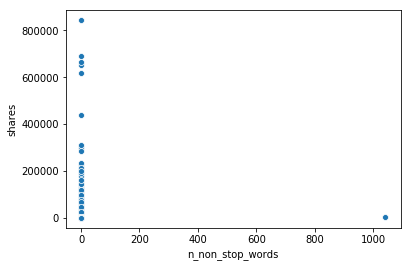

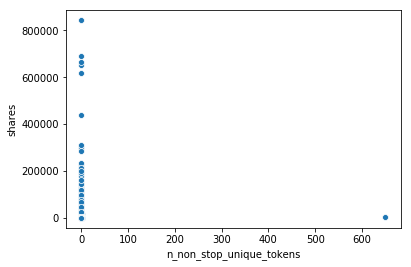

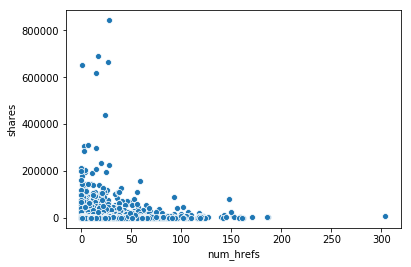

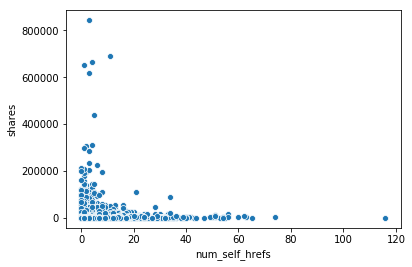

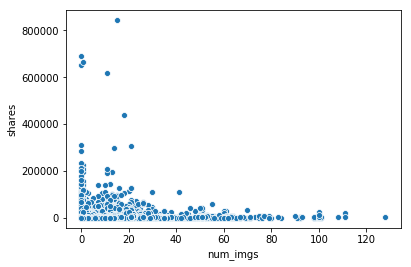

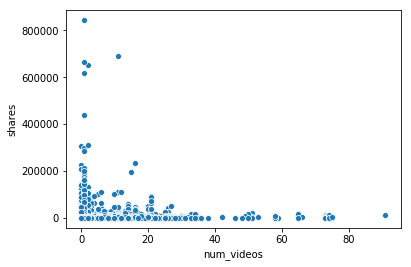

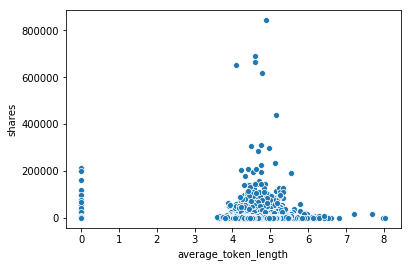

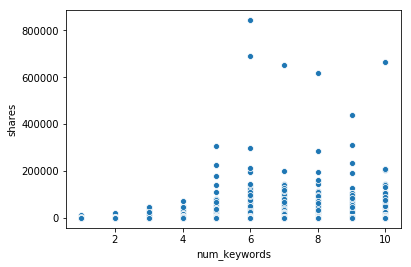

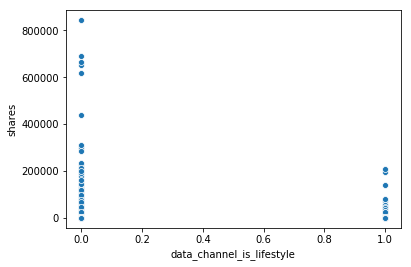

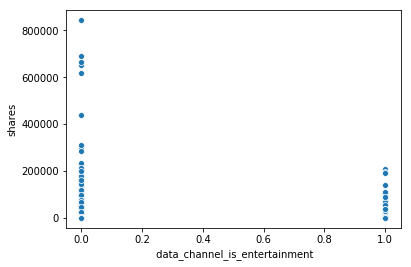

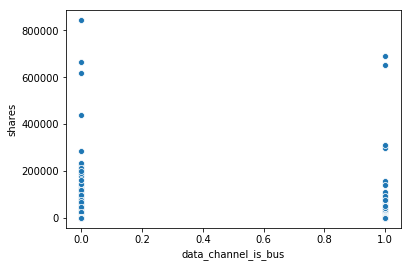

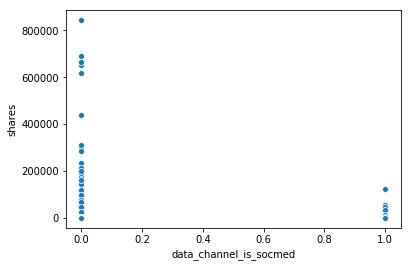

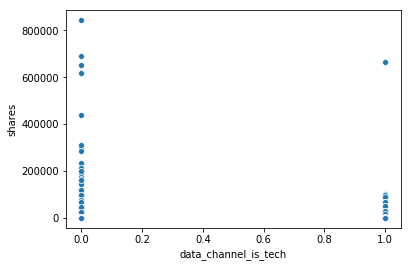

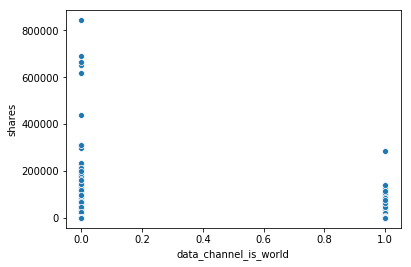

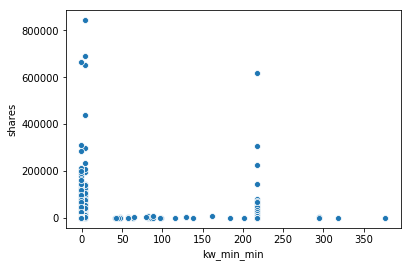

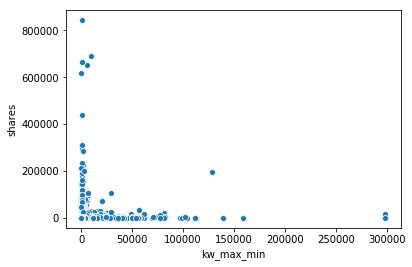

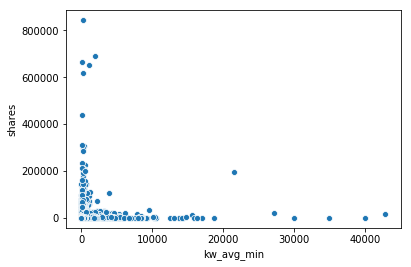

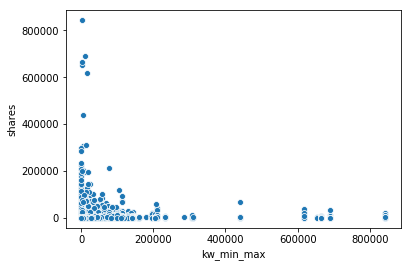

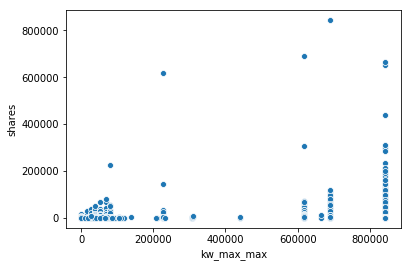

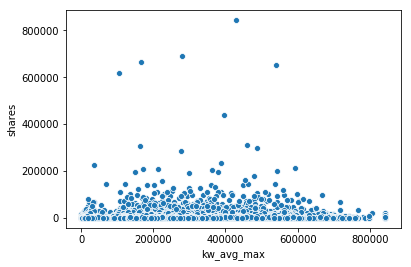

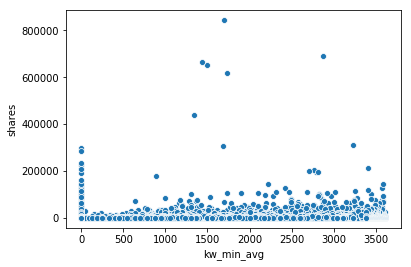

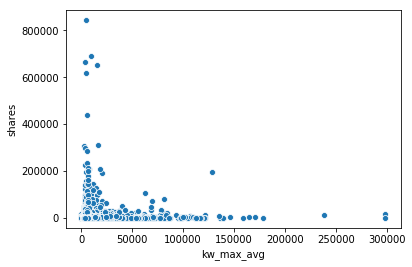

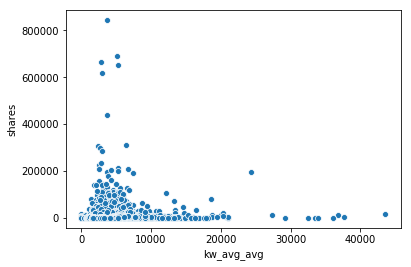

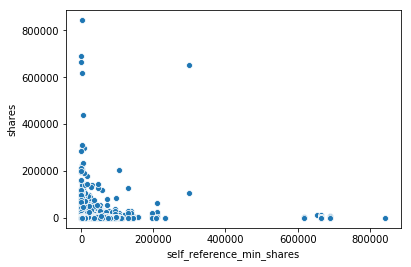

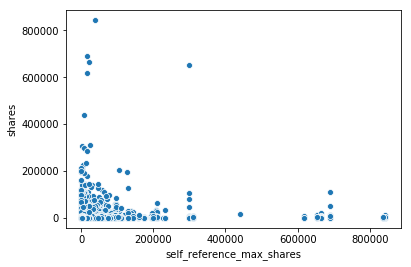

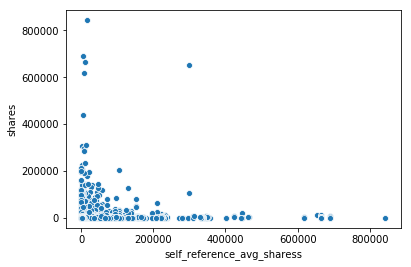

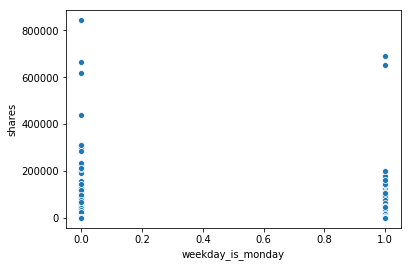

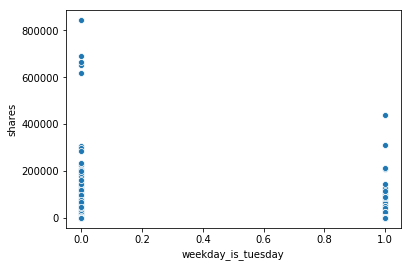

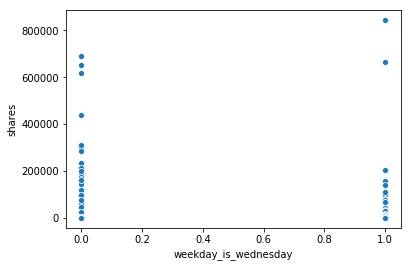

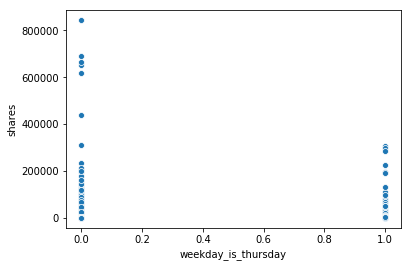

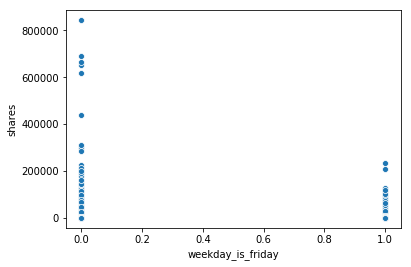

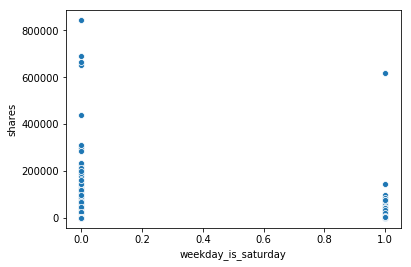

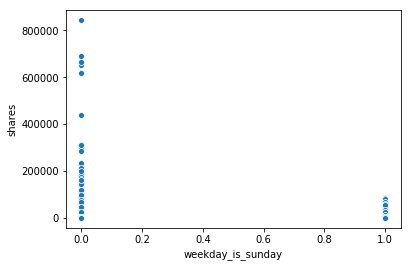

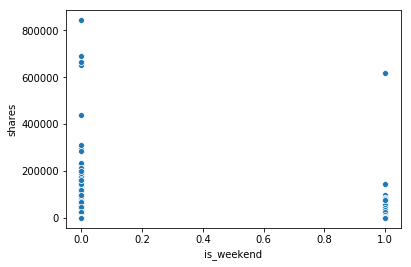

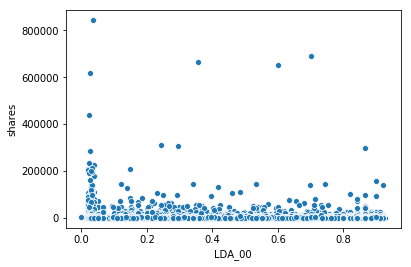

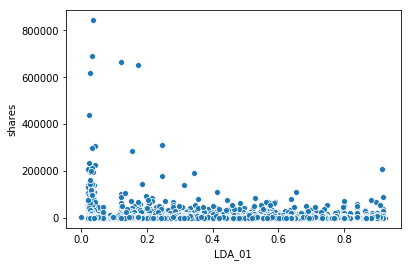

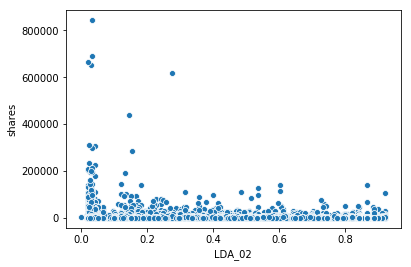

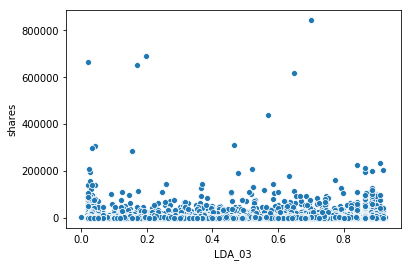

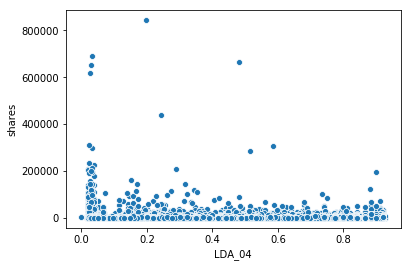

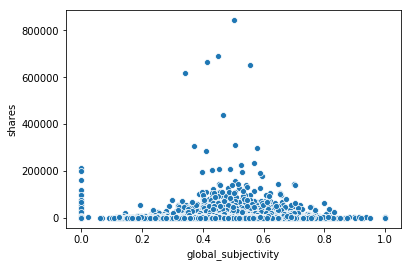

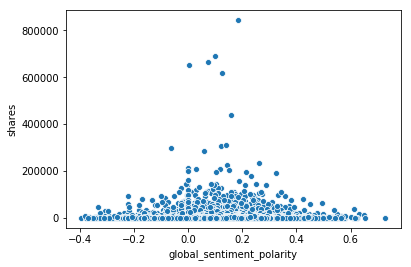

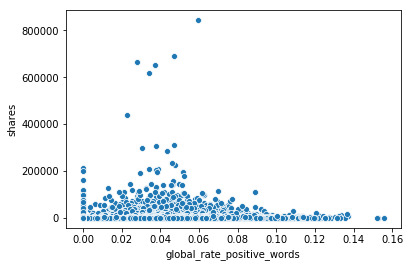

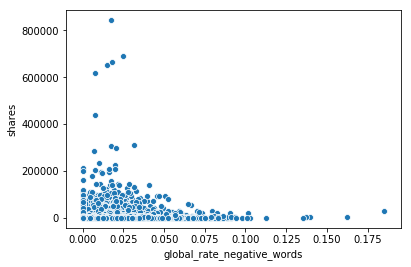

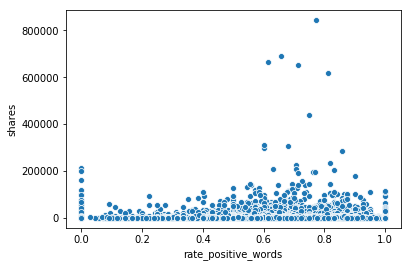

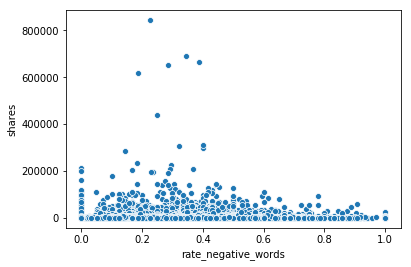

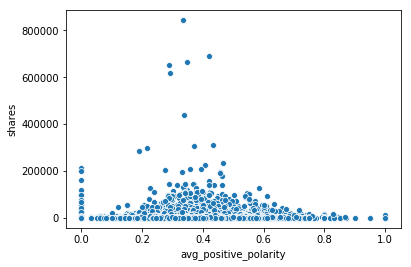

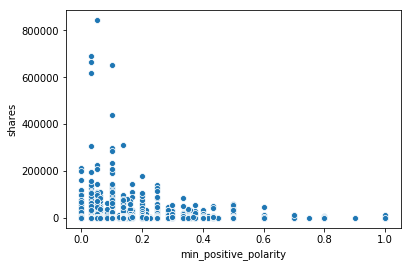

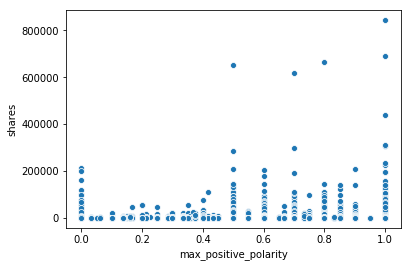

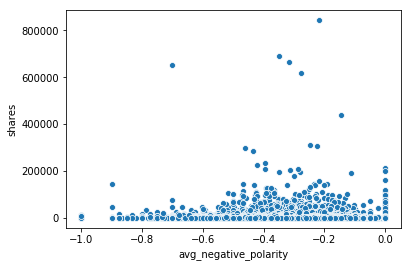

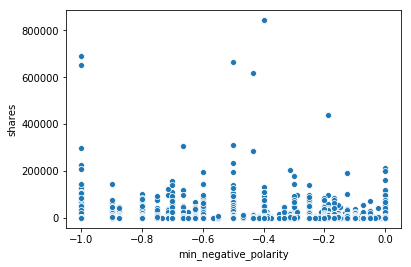

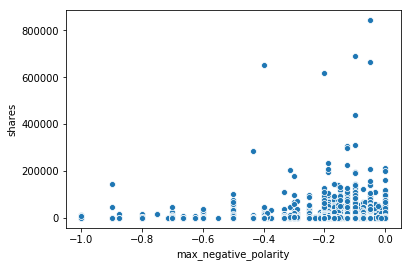

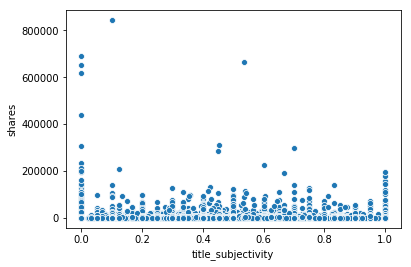

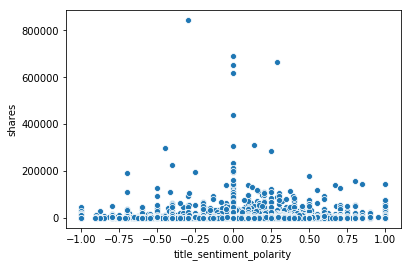

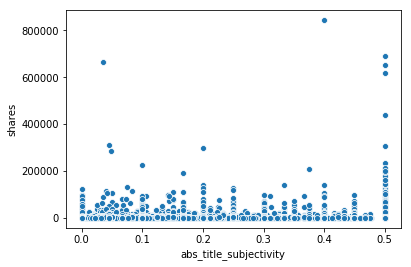

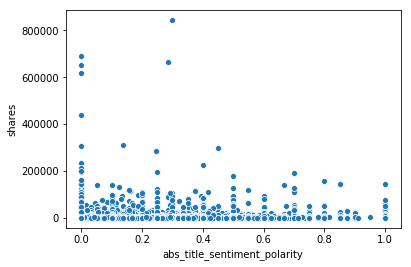

In [9]:
# for each variable we can check the relationship with the target variable. 
for each_feature in features:
    sns.scatterplot(df[each_feature], df.shares)
    plt.show()

At least as per each of the features, we could not see if there is any linear relationship amongst the features with the target, which in this case is the number of shares. 

As we have too many features, hence pairplotting will be very coagulated visually. Let's, hence, check the correlation of the data of features w.r.t the target. 

In [10]:
# Compute the correlation matrix
corr = df.corr()

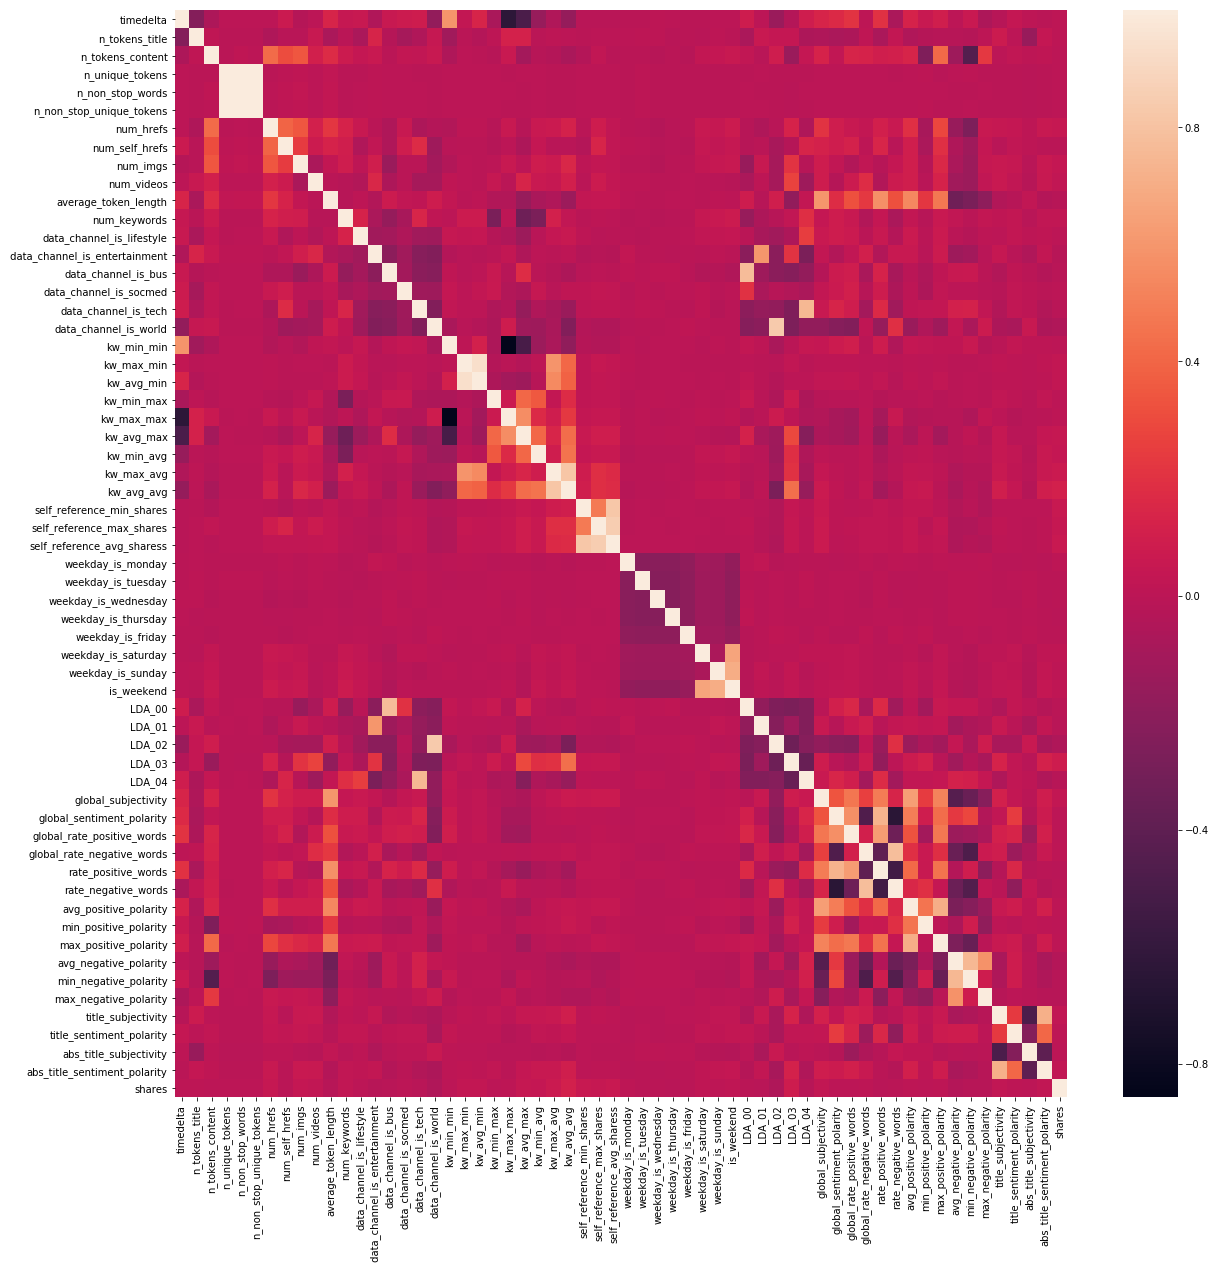

In [11]:
# Checking pairplots of all data. 
plt.figure(figsize=(20,20))
sns.heatmap(corr)
plt.show()

Clearly, there are many features which are very heavily correlated with each other. This will cause issues with modelling, as our final model may become biased. Hence, we'd have to remove all highly correlated variables. 

Before we do so, we can concentrate on the target variable to see if we can find a list of most correlated variables. However, we will need to repeat this exercise later on again, after we have removed highly correlated features. 

In [12]:
# Create dataframe to store the correlation with target column
corr_shares = pd.DataFrame(corr['shares'])

In [13]:
# Checking the dataframe. 
corr_shares.head()

,shares
timedelta,0.008662
n_tokens_title,0.008783
n_tokens_content,0.002459
n_unique_tokens,0.000806
n_non_stop_words,0.000443


In [14]:
# Checking positive correlation. 
positive_corr = corr_shares[corr_shares.shares > 0]

# Sort the dataframe
positive_corr.sort_values(by='shares', ascending=False, inplace=True)

# check the data. 
positive_corr.head(11)

,shares
shares,1.000000
kw_avg_avg,0.110413
LDA_03,0.083771
kw_max_avg,0.064306
self_reference_avg_sharess,0.057789
self_reference_min_shares,0.055958
self_reference_max_shares,0.047115
num_hrefs,0.045404
kw_avg_max,0.044686
kw_min_avg,0.039551


Although there is not high correlation, but we can clearly see the top 10 features, ignoring the shares variables itself, which are useful to describe the target variable. 

let's also check if the target variable is having a normal distribution or not. 

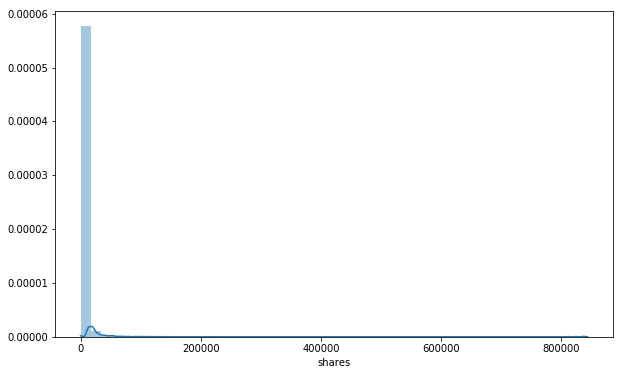

In [15]:
# Creating distribution plot. 
plt.figure(figsize=(10,6))
sns.distplot(df.shares)
plt.show()

Clearly the target variable is not normally distributed, which should not be the case. Hence, we need to transform the target into having a normal distribution. 

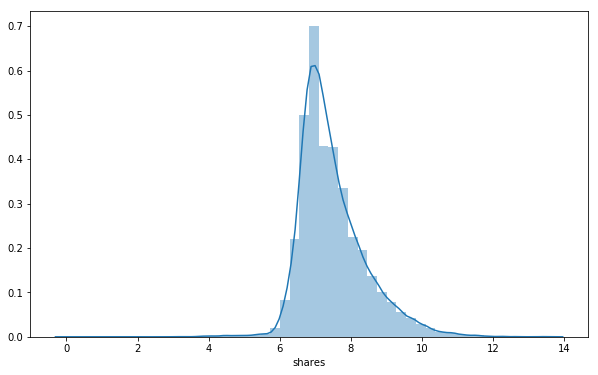

In [17]:
# Creating distribution plot using log() of target variable. 
plt.figure(figsize=(10,6))
sns.distplot(np.log(df.shares))
plt.show()

In [18]:
# Transforming the target variable. 
df.shares = np.log(df.shares)

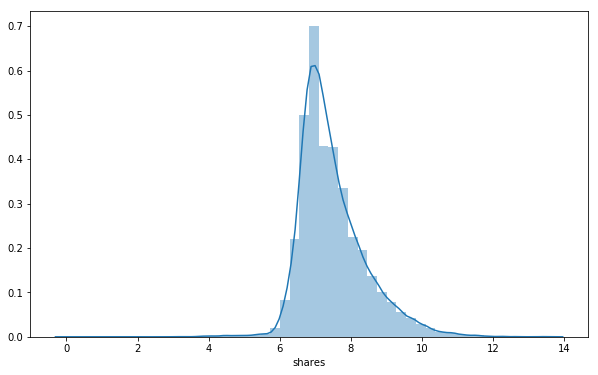

In [19]:
# Creating distribution plot. 
plt.figure(figsize=(10,6))
sns.distplot(df.shares)
plt.show()

Before we proceed ahead, let's check the overall distribution of each of the feature variables as well. 

Histogram for column :  timedelta
************************************************


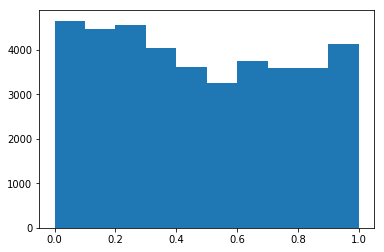

************************************************
Histogram for column :  n_tokens_title
************************************************


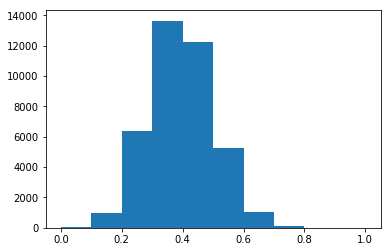

************************************************
Histogram for column :  n_tokens_content
************************************************


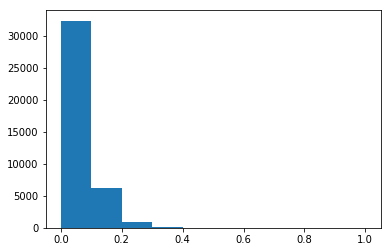

************************************************
Histogram for column :  n_unique_tokens
************************************************


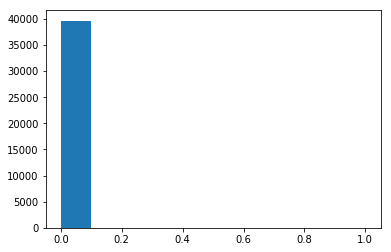

************************************************
Histogram for column :  n_non_stop_words
************************************************


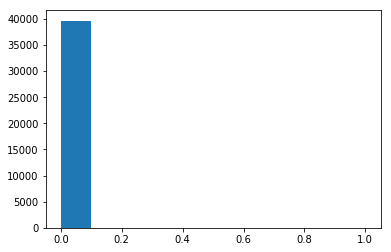

************************************************
Histogram for column :  n_non_stop_unique_tokens
************************************************


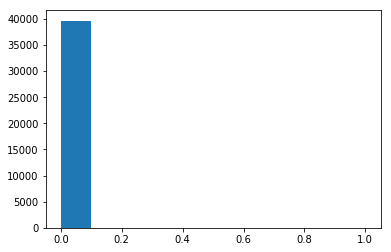

************************************************
Histogram for column :  num_hrefs
************************************************


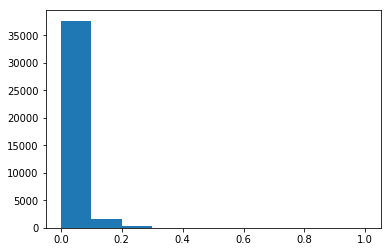

************************************************
Histogram for column :  num_self_hrefs
************************************************


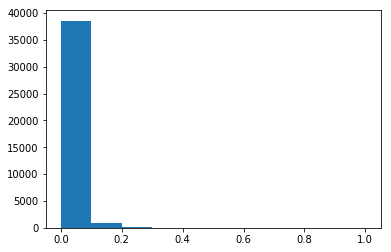

************************************************
Histogram for column :  num_imgs
************************************************


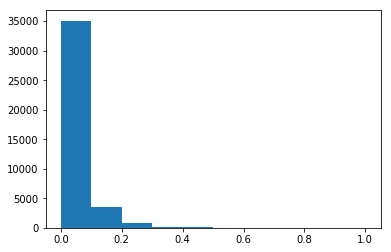

************************************************
Histogram for column :  num_videos
************************************************


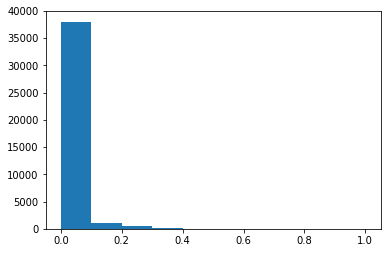

************************************************
Histogram for column :  average_token_length
************************************************


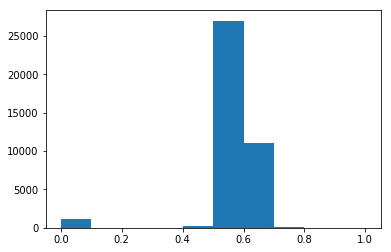

************************************************
Histogram for column :  num_keywords
************************************************


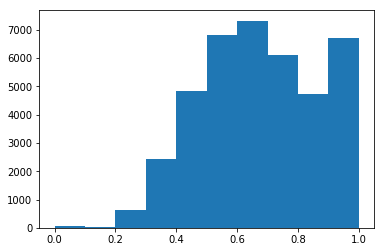

************************************************
Histogram for column :  data_channel_is_lifestyle
************************************************


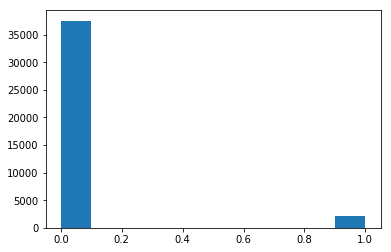

************************************************
Histogram for column :   data_channel_is_entertainment
************************************************


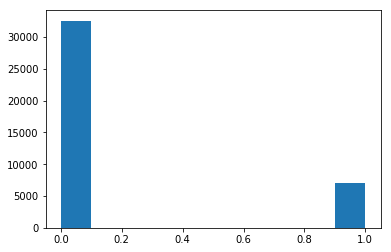

************************************************
Histogram for column :  data_channel_is_bus
************************************************


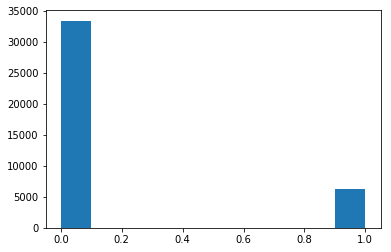

************************************************
Histogram for column :  data_channel_is_socmed
************************************************


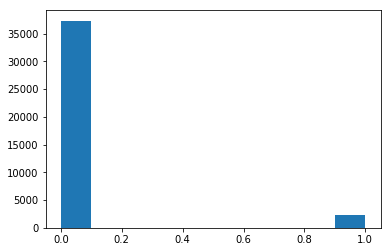

************************************************
Histogram for column :  data_channel_is_tech
************************************************


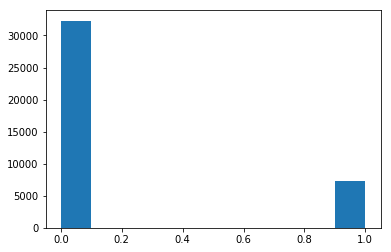

************************************************
Histogram for column :  data_channel_is_world
************************************************


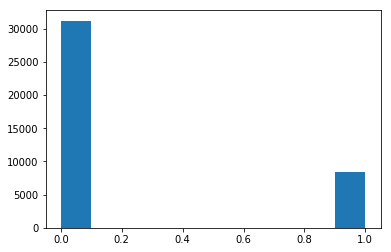

************************************************
Histogram for column :  kw_min_min
************************************************


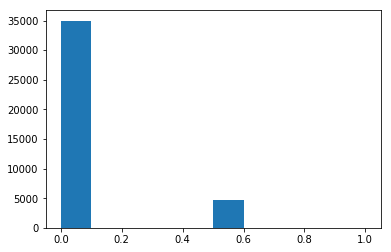

************************************************
Histogram for column :  kw_max_min
************************************************


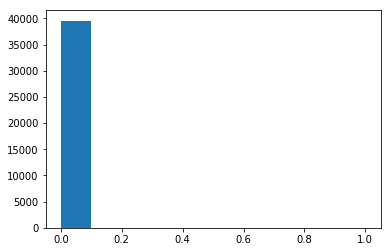

************************************************
Histogram for column :  kw_avg_min
************************************************


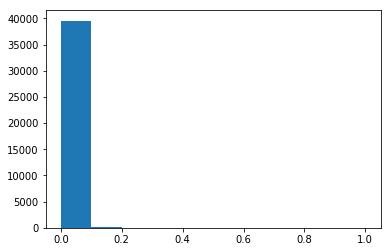

************************************************
Histogram for column :  kw_min_max
************************************************


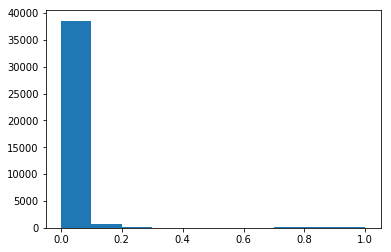

************************************************
Histogram for column :  kw_max_max
************************************************


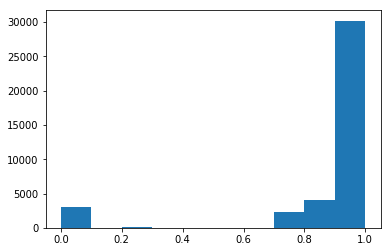

************************************************
Histogram for column :  kw_avg_max
************************************************


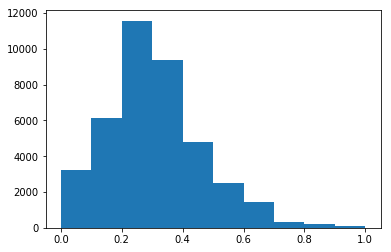

************************************************
Histogram for column :  kw_min_avg
************************************************


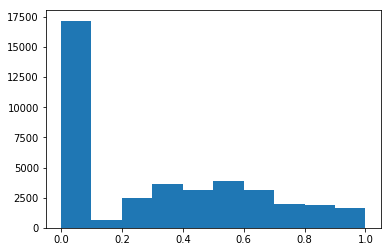

************************************************
Histogram for column :  kw_max_avg
************************************************


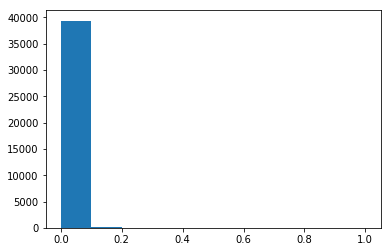

************************************************
Histogram for column :  kw_avg_avg
************************************************


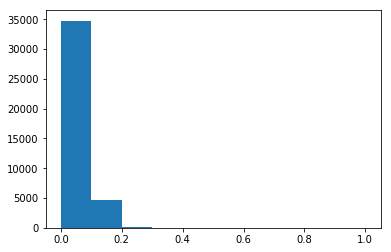

************************************************
Histogram for column :  self_reference_min_shares
************************************************


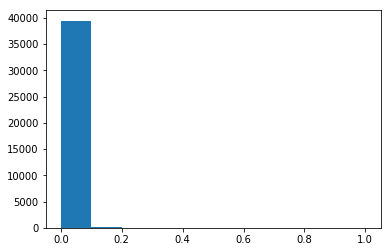

************************************************
Histogram for column :  self_reference_max_shares
************************************************


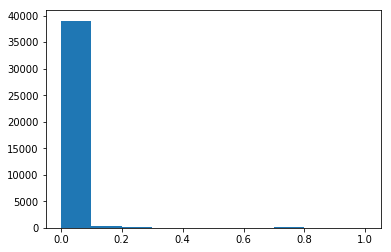

************************************************
Histogram for column :  self_reference_avg_sharess
************************************************


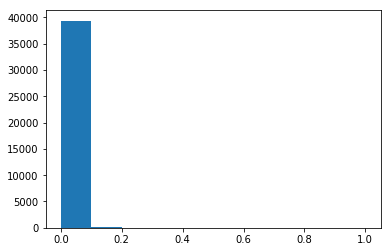

************************************************
Histogram for column :  weekday_is_monday
************************************************


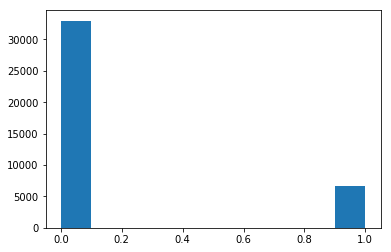

************************************************
Histogram for column :  weekday_is_tuesday
************************************************


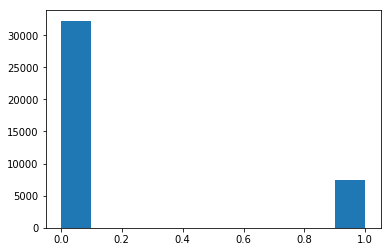

************************************************
Histogram for column :  weekday_is_wednesday
************************************************


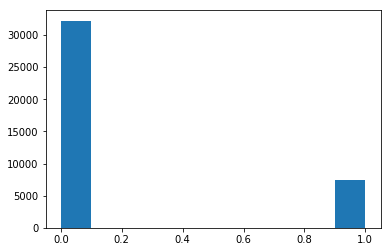

************************************************
Histogram for column :  weekday_is_thursday
************************************************


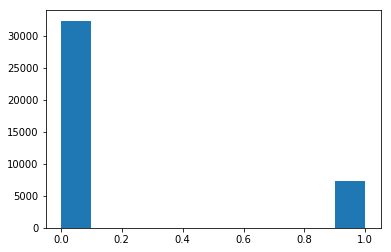

************************************************
Histogram for column :  weekday_is_friday
************************************************


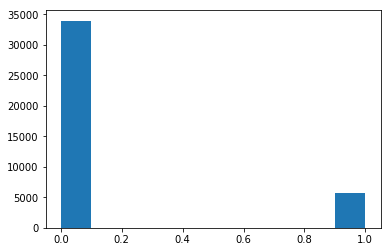

************************************************
Histogram for column :  weekday_is_saturday
************************************************


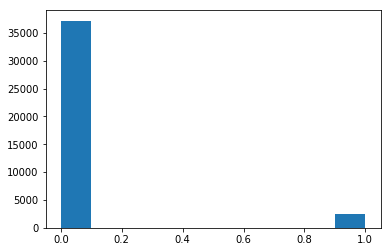

************************************************
Histogram for column :  weekday_is_sunday
************************************************


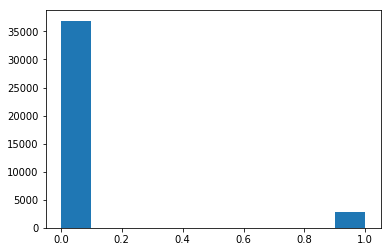

************************************************
Histogram for column :  is_weekend
************************************************


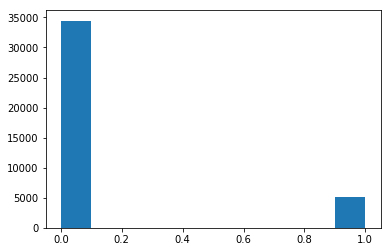

************************************************
Histogram for column :  LDA_00
************************************************


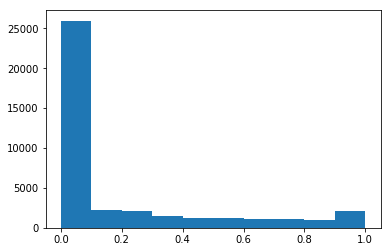

************************************************
Histogram for column :  LDA_01
************************************************


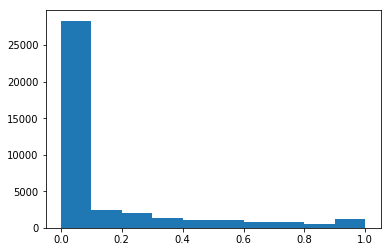

************************************************
Histogram for column :  LDA_02
************************************************


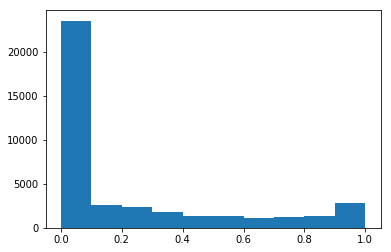

************************************************
Histogram for column :  LDA_03
************************************************


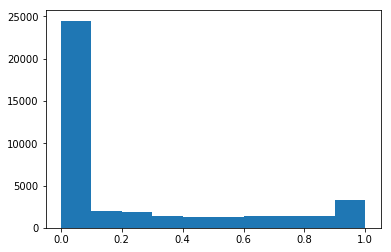

************************************************
Histogram for column :  LDA_04
************************************************


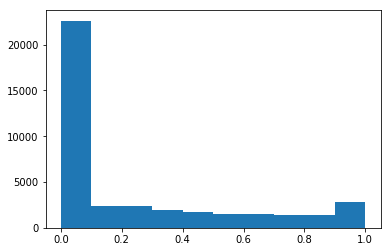

************************************************
Histogram for column :  global_subjectivity
************************************************


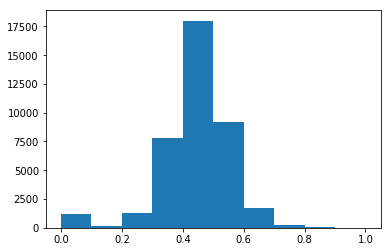

************************************************
Histogram for column :  global_sentiment_polarity
************************************************


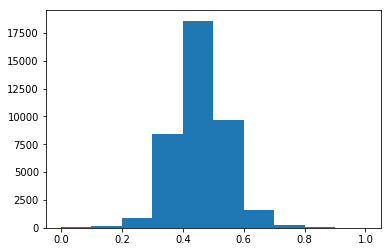

************************************************
Histogram for column :  global_rate_positive_words
************************************************


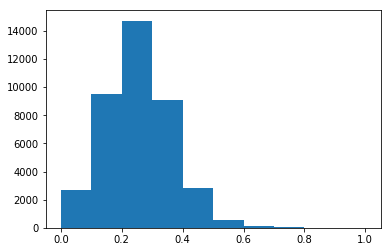

************************************************
Histogram for column :  global_rate_negative_words
************************************************


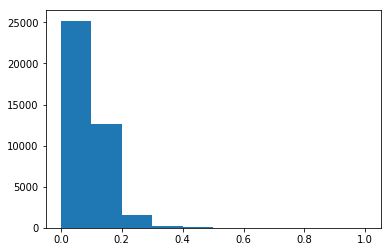

************************************************
Histogram for column :  rate_positive_words
************************************************


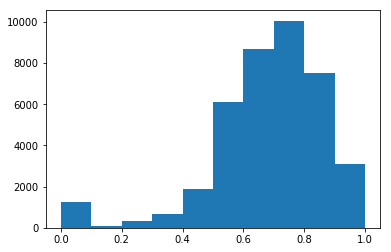

************************************************
Histogram for column :  rate_negative_words
************************************************


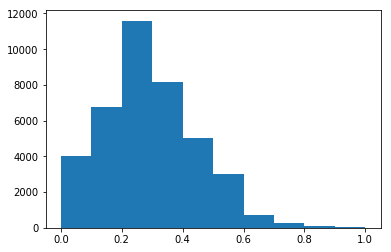

************************************************
Histogram for column :  avg_positive_polarity
************************************************


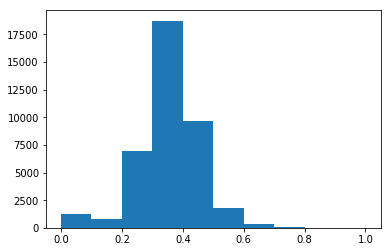

************************************************
Histogram for column :  min_positive_polarity
************************************************


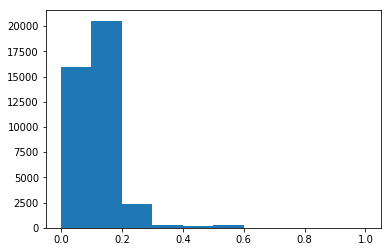

************************************************
Histogram for column :  max_positive_polarity
************************************************


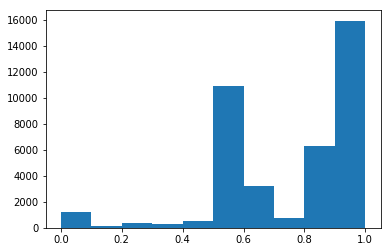

************************************************
Histogram for column :  avg_negative_polarity
************************************************


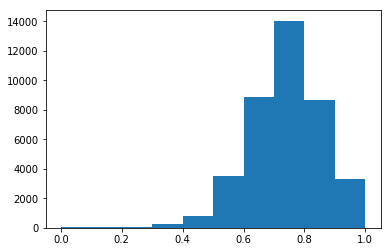

************************************************
Histogram for column :  min_negative_polarity
************************************************


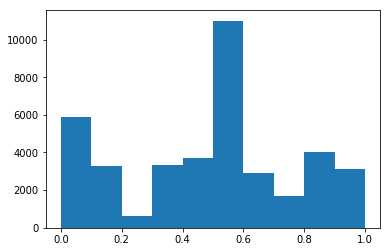

************************************************
Histogram for column :  max_negative_polarity
************************************************


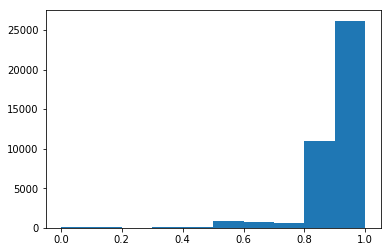

************************************************
Histogram for column :  title_subjectivity
************************************************


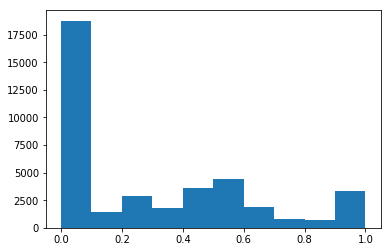

************************************************
Histogram for column :  title_sentiment_polarity
************************************************


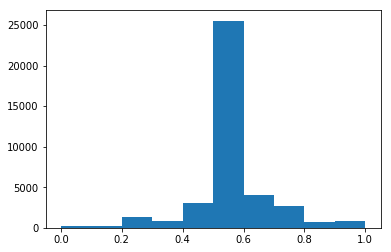

************************************************
Histogram for column :  abs_title_subjectivity
************************************************


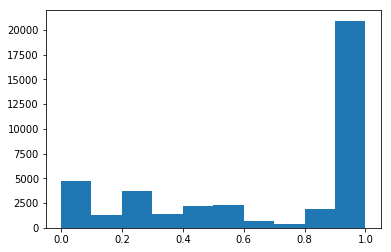

************************************************
Histogram for column :  abs_title_sentiment_polarity
************************************************


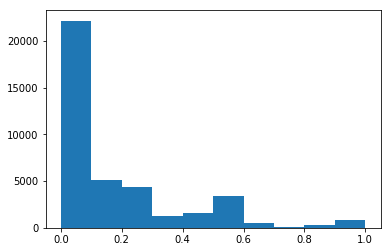

************************************************


In [28]:
# Checking histogram of all columns. 
for each_feature in features:
    print("Histogram for column : ", each_feature)
    print("************************************************")
    plt.hist(df[each_feature])
    plt.show()
    print("************************************************")

#### 2. Data Preparation

Before we progress with the modelling section, we'd need to perform preparation of the data, inclusive of splitting the data into Training and Testing sets. 

In [30]:
# Checking basic statistics of the feature columns once more.  
pd.set_option('display.max_columns', None)
df[features].describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.479295,0.399940,0.064493,0.000782,0.000956,0.001060,0.035802,0.028393,0.035501,0.013735,0.565594,0.691530,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,0.071711,0.003867,0.007317,0.016142,0.892119,0.307461,0.309390,0.018958,0.071977,0.004742,0.012249,0.007591,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.199137,0.152553,0.235132,0.241513,0.252407,0.443370,0.457439,0.254842,0.089828,0.682150,0.287934,0.353825,0.095446,0.756728,0.740476,0.478056,0.892500,0.282353,0.535713,0.683686,0.156064
std,0.296215,0.100668,0.055594,0.005022,0.005020,0.005023,0.037276,0.033234,0.064917,0.045141,0.105006,0.212126,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,0.184215,0.012929,0.014495,0.068761,0.254360,0.160207,0.314733,0.020439,0.030255,0.023406,0.048651,0.028710,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.283685,0.237279,0.306680,0.318597,0.311892,0.116685,0.086422,0.112090,0.058550,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.132725,0.377582,0.226294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.215768,0.333333,0.029030,0.000672,0.000960,0.000963,0.013158,0.008621,0.007812,0.000000,0.556909,0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001491,0.003333,0.000000,1.000000,0.204965,0.000277,0.011937,0.054684,0.000758,0.001304,0.001164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027023,0.027013,0.031056,0.030837,0.030817,0.396167,0.402560,0.182550,0.051994,0.600000,0.185185,0.306244,0.050000,0.600000,0.671617,0.300000,0.875000,0.000000,0.500000,0.333333,0.000000
50%,0.457815,0.380952,0.048265,0.00076

Looking at the basic statistics above, it is clear that basic feature scaling would prove useful. 

In [23]:
#Importing the library to perform Min Max scaling. 
from sklearn.preprocessing import MinMaxScaler

# Creating an object to perform scaling. 
scaler = MinMaxScaler()

In [25]:
# Scaling all feature columns. 
df[features] = scaler.fit_transform(df[features])

In [29]:
# Checking overall statistics. 
pd.set_option('display.max_columns', None)
df[features].describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.479295,0.399940,0.064493,0.000782,0.000956,0.001060,0.035802,0.028393,0.035501,0.013735,0.565594,0.691530,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,0.071711,0.003867,0.007317,0.016142,0.892119,0.307461,0.309390,0.018958,0.071977,0.004742,0.012249,0.007591,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.199137,0.152553,0.235132,0.241513,0.252407,0.443370,0.457439,0.254842,0.089828,0.682150,0.287934,0.353825,0.095446,0.756728,0.740476,0.478056,0.892500,0.282353,0.535713,0.683686,0.156064
std,0.296215,0.100668,0.055594,0.005022,0.005020,0.005023,0.037276,0.033234,0.064917,0.045141,0.105006,0.212126,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,0.184215,0.012929,0.014495,0.068761,0.254360,0.160207,0.314733,0.020439,0.030255,0.023406,0.048651,0.028710,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.283685,0.237279,0.306680,0.318597,0.311892,0.116685,0.086422,0.112090,0.058550,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.132725,0.377582,0.226294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.215768,0.333333,0.029030,0.000672,0.000960,0.000963,0.013158,0.008621,0.007812,0.000000,0.556909,0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001491,0.003333,0.000000,1.000000,0.204965,0.000277,0.011937,0.054684,0.000758,0.001304,0.001164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027023,0.027013,0.031056,0.030837,0.030817,0.396167,0.402560,0.182550,0.051994,0.600000,0.185185,0.306244,0.050000,0.600000,0.671617,0.300000,0.875000,0.000000,0.500000,0.333333,0.000000
50%,0.457815,0.380952,0.048265,0.00076

Finally, let's now perform the split of the data for training and testing. 

In [31]:
# Importing library for train test split. 
from sklearn.model_selection import train_test_split

In [32]:
# creating the dataframe with features. 
X = df[features]

In [34]:
# Creating the dataframe with target column. 
y = df.shares

In [36]:
# Creating the training and testing data. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Now we are ready to perform modelling of the dataset. We'll make use of Linear Regression technique to predict the number of shares, as of course, but we will also perform Recursive Feature Elimination (RFE) to reduce the number of variables to the ones really needed. 

#### 3. Modelling 

In [37]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [54]:
# Creating and fitting Linear Regression Model. 
lm = LinearRegression()
lm.fit(X_train, y_train)

# Perform RFE with the output number of the variable equal to 30
rfe = RFE(lm, 30)
rfe = rfe.fit(X_train, y_train)

Let's first check the features qualified as important by our model as per RFE. 

In [55]:
# Finding important columns as per RFE Support Parameter
col = X_train.columns[rfe.support_]

# Print the columns. 
col

Index(['n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'average_token_length', 'data_channel_is_socmed',
       'data_channel_is_tech', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_avg_sharess', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'rate_positive_words', 'rate_negative_words', 'min_positive_polarity'],
      dtype='object')

As we now have the list of columns which are considered as important, let's re-structure our Training data to fit another new model. 

In [56]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

We'll create the new model first with Statsmodels API Library, as it will provide detailed report. 

In [57]:
# Importing library. 
import statsmodels.api as sm  

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [58]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [59]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     126.7
Date:                Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:54:13   Log-Likelihood:                -35555.
No. Observations:               27750   AIC:                         7.117e+04
Df Residuals:                   27719   BIC:                         7.143e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

It seems, there is still presence of multi-collinearity in our dataset. Also, there are many variables with quite high p-value as per above output. 

We can try and perform VIF (Variance Inflation Factor) Analysis to find the columns which are causing such a case, and remove them from the modelling. 

In [61]:
# Checking the columns in the training data once. 
X_train_rfe.columns

Index(['const', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'average_token_length', 'data_channel_is_socmed',
       'data_channel_is_tech', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_avg_sharess', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'rate_positive_words', 'rate_negative_words', 'min_positive_polarity'],
      dtype='object')

In [63]:
# Dropping the constant column. 
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [64]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,n_unique_tokens,17593.49
3,n_non_stop_unique_tokens,11523.15
2,n_non_stop_words,4701.67
7,average_token_length,360.86
27,rate_positive_words,272.74
17,kw_avg_avg,61.70
28,rate_negative_words,60.41
26,global_subjectivity,33.60
14,kw_avg_max,12.55
16,kw_max_avg,12.31


In [65]:
# Dropping the columns with very high VIF
X_train_new = X_train_new.drop(['n_unique_tokens'], axis=1)
X_train_new = X_train_new.drop(['n_non_stop_unique_tokens'], axis=1)
X_train_new = X_train_new.drop(['n_non_stop_words'], axis=1)

In [66]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,average_token_length,328.10
24,rate_positive_words,221.65
14,kw_avg_avg,61.69
25,rate_negative_words,48.30
23,global_subjectivity,33.52
11,kw_avg_max,12.51
13,kw_max_avg,12.30
21,LDA_03,11.81
22,LDA_04,11.47
9,kw_avg_min,11.34


In [67]:
# Dropping the columns with very high VIF
X_train_new = X_train_new.drop(['average_token_length'], axis=1)
X_train_new = X_train_new.drop(['rate_positive_words'], axis=1)
X_train_new = X_train_new.drop(['kw_avg_avg'], axis=1)
X_train_new = X_train_new.drop(['rate_negative_words'], axis=1)
X_train_new = X_train_new.drop(['global_subjectivity'], axis=1)

In [68]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,kw_avg_max,10.95
8,kw_avg_min,10.37
7,kw_max_min,9.43
20,LDA_04,4.85
19,LDA_03,4.73
0,n_tokens_content,3.55
16,LDA_00,3.33
12,kw_max_avg,3.10
21,min_positive_polarity,3.09
14,self_reference_avg_sharess,2.99


In [69]:
# Dropping the columns with very high VIF
X_train_new = X_train_new.drop(['kw_avg_max'], axis=1)
X_train_new = X_train_new.drop(['kw_avg_min'], axis=1)
X_train_new = X_train_new.drop(['kw_max_min'], axis=1)

In [70]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,LDA_04,4.05
0,n_tokens_content,3.54
18,min_positive_polarity,3.08
11,self_reference_avg_sharess,2.96
5,data_channel_is_tech,2.87
1,num_hrefs,2.83
10,self_reference_min_shares,2.81
16,LDA_03,2.48
8,kw_min_avg,2.38
2,num_self_hrefs,2.28


It seems, now using VIF method, we have indeed gotten rid of lot of multi-collinearity. Further, let's check if the error residuals are normally distributed or not, which is also a very important assumption of Linear Regression Modelling. 

In [74]:
# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

# Fitting the OLS Model. 
lm = sm.OLS(y_train,X_train_new).fit()

# Creating the predictions. 
y_pred = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

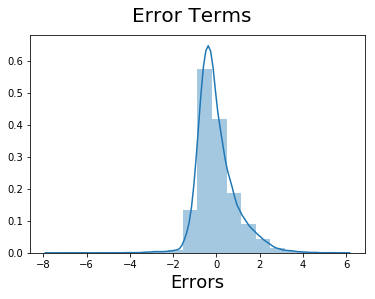

In [75]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Clearly, the error terms are normally distributed. Hence we have a good model in place, with very low or negligible VIF, normally distruted target column values, and normally distributed Error terms. 

#### 4. Final Modelling. 

In this section, we will build our final model, using sklearn library as we now know the columns which we need to use to create the final model. 

In [78]:
# Importing the libraries. 
from sklearn.linear_model import LinearRegression

# Creating object of Linear regression model. 
lm = LinearRegression()

In [80]:
# Droppping the const column. 
X_train_new.drop('const', axis=1, inplace=True)

# Checking final columns. 
X_train_new.columns

Index(['n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'data_channel_is_socmed', 'data_channel_is_tech', 'kw_min_min',
       'kw_min_max', 'kw_min_avg', 'kw_max_avg', 'self_reference_min_shares',
       'self_reference_avg_sharess', 'is_weekend', 'LDA_00', 'LDA_01',
       'LDA_02', 'LDA_03', 'LDA_04', 'min_positive_polarity'],
      dtype='object')

In [93]:
# Creating new dataset 
df_new = df[['n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'data_channel_is_socmed', 'data_channel_is_tech', 'kw_min_min',
       'kw_min_max', 'kw_min_avg', 'kw_max_avg', 'self_reference_min_shares',
       'self_reference_avg_sharess', 'is_weekend', 'LDA_00', 'LDA_01',
       'LDA_02', 'LDA_03', 'LDA_04', 'min_positive_polarity', 'shares']]

# Creating new dataset of features. 
X = df_new[['n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'data_channel_is_socmed', 'data_channel_is_tech', 'kw_min_min',
       'kw_min_max', 'kw_min_avg', 'kw_max_avg', 'self_reference_min_shares',
       'self_reference_avg_sharess', 'is_weekend', 'LDA_00', 'LDA_01',
       'LDA_02', 'LDA_03', 'LDA_04', 'min_positive_polarity']]

# Creating the target variable dataframe
y = df_new.shares

In [94]:
# Checking shape of the features' dataset. 
X.shape

(39644, 19)

In [95]:
# Checking shape of the target dataset. 
y.shape

(39644,)

In [96]:
# Creating the final training and testing split. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
# Fitting the final model. 
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
# To retrieve the intercept:
print("The intercept of our final model is: ", lm.intercept_)
print("")

# For retrieving the slope:
print("The Coefficnents of our final model is: ", lm.coef_)

The intercept of our final model is:  8.323761477872836

The Coefficnents of our final model is:  [ 0.05455154  2.11130989 -1.50619788  0.56486694  0.31493165  0.1838271
  0.17320507 -0.44952499  0.21490074  2.84840284  1.32220382  1.33687736
  0.27995795 -0.92076242 -1.19146982 -1.33341719 -0.79883075 -0.97120637
 -0.20349687]


In [100]:
# Perform Predictions. 
y_pred = lm.predict(X_test)

In [105]:
# Storing results. 
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head(10)

,Actual,Predicted
32340,7.972466,7.544209
10480,7.170120,7.414380
15370,9.781320,7.571996
31592,7.313220,7.396138
198,7.244228,7.574547
37834,7.972466,7.340649
624,6.685861,7.560197
22135,8.006368,7.671880
29798,6.907755,7.405651
32896,5.905362,7.132559


Our final model is ready. In some cases we see that the values predict do not exactly match the actual values. During the final stage of model evaluation we will find out our model's accuracy and other factors. 

#### 5. Model Evaluation

Finally, we will evaluate our model and try to describe it. We'll use both visual and mathematical measures to find the model's performance. 

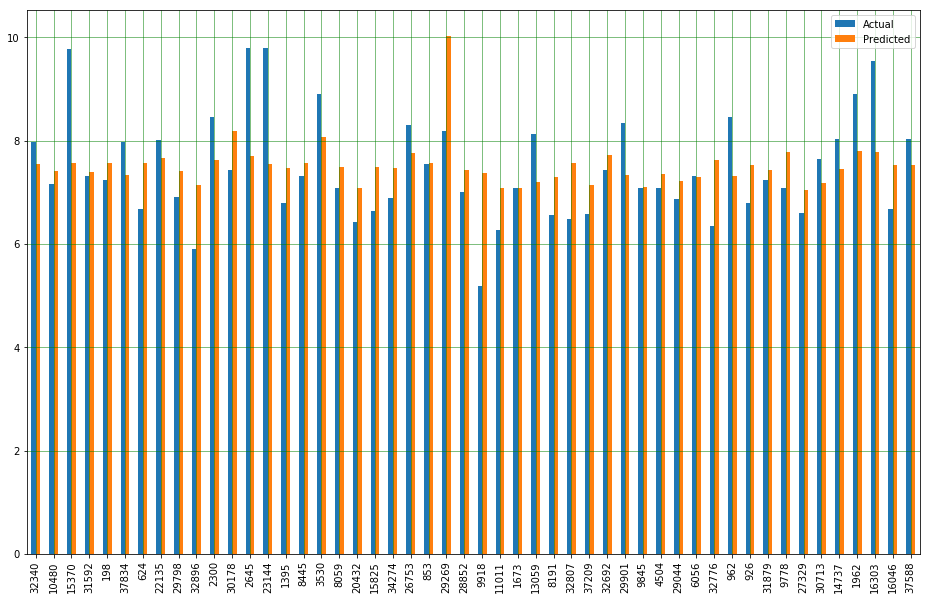

In [109]:
# Creating visual representation of our predictions. 
results.head(50).plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

As seen above, in many cases the prediction is good, but not always.

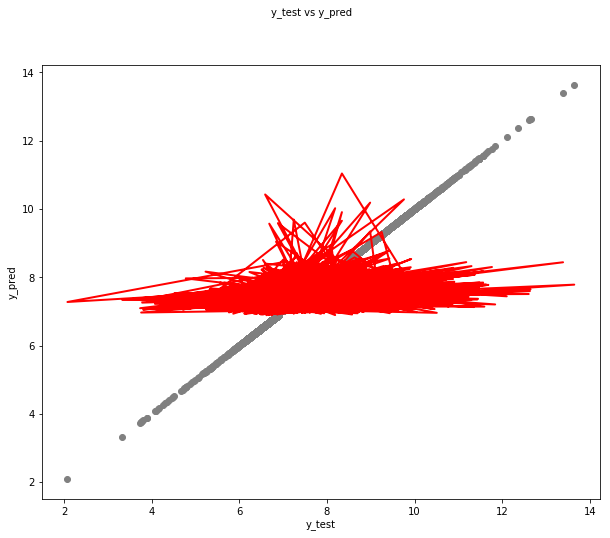

In [119]:
fig = plt.figure(figsize=(10,8))
plt.scatter(y_test, y_test,  color='gray')
plt.plot(y_test, y_pred, color='red', linewidth=2)
plt.suptitle('y_test vs y_pred', fontsize=10)              # Plot heading 
plt.xlabel('y_test', fontsize=10)                          # X-label
plt.ylabel('y_pred', fontsize=10)                          # Y-label
plt.show()

In [121]:
# importing the required library. 
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [122]:
# Checking all the metrics. 
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6668387171402383
Mean Squared Error: 0.7990859507660658
Root Mean Squared Error: 0.8939160759076132


Our final model is not very good, but not bad as well and can be used for predicting the Shares of specific URLs of pages on Mashable. Finally, let's try to describe the model. 

#### 6. Model Description

In [130]:
# Re-checking the coefficients of the model. 
print("The Coefficients of our final model is: ", lm.coef_)

The Coefficients of our final model is:  [ 0.05455154  2.11130989 -1.50619788  0.56486694  0.31493165  0.1838271
  0.17320507 -0.44952499  0.21490074  2.84840284  1.32220382  1.33687736
  0.27995795 -0.92076242 -1.19146982 -1.33341719 -0.79883075 -0.97120637
 -0.20349687]


In [128]:
# Checking the Training columns. 
X_train.columns

Index(['n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'data_channel_is_socmed', 'data_channel_is_tech', 'kw_min_min',
       'kw_min_max', 'kw_min_avg', 'kw_max_avg', 'self_reference_min_shares',
       'self_reference_avg_sharess', 'is_weekend', 'LDA_00', 'LDA_01',
       'LDA_02', 'LDA_03', 'LDA_04', 'min_positive_polarity'],
      dtype='object')

In [156]:
# Creating a dataframe of coefficients and columns. 
output = pd.DataFrame(list(zip(features, lm.coef_)), columns=['Feature','Coefficient'])
output

,Feature,Coefficient
0,timedelta,0.054552
1,n_tokens_title,2.111310
2,n_tokens_content,-1.506198
3,n_unique_tokens,0.564867
4,n_non_stop_words,0.314932
5,n_non_stop_unique_tokens,0.183827
6,num_hrefs,0.173205
7,num_self_hrefs,-0.449525
8,num_imgs,0.214901
9,num_videos,2.848403


Now that we have the dataframe explaining the features we have usd in this model and their respective coefficients as per our model, we can explain them and also evaluate which parameters have positive &/or negetive effect on the target variable as per our Model's outcome. 

In [157]:
# Find +ively correlated features. 
positive_features = pd.DataFrame(output[output.Coefficient>0].sort_values(by='Coefficient', ascending=False))
positive_features

,Feature,Coefficient
9,num_videos,2.848403
1,n_tokens_title,2.111310
11,num_keywords,1.336877
10,average_token_length,1.322204
3,n_unique_tokens,0.564867
4,n_non_stop_words,0.314932
12,data_channel_is_lifestyle,0.279958
8,num_imgs,0.214901
5,n_non_stop_unique_tokens,0.183827
6,num_hrefs,0.173205


In [162]:
# Converting the coefficients to the nearest round
positive_features.Coefficient = round(positive_features.Coefficient,0).astype('int')

In [168]:
# Keeping only those features, where the positive coefficient value is > 0
positive_features = positive_features[positive_features.Coefficient>0]
positive_features

,Feature,Coefficient
9,num_videos,3
1,n_tokens_title,2
11,num_keywords,1
10,average_token_length,1
3,n_unique_tokens,1


As seen above, the positively correlated features, which increases the # of shares of a particular URL to a considerable extent are as follows:

1. num_videos : Number of videos					
2. n_tokens_title : Number of words in the title			
3. num_keywords : Number of keywords in the metadata 				
4. average_token_length : Average length of the words in the content 		
5. n_unique_tokens : Rate of unique words in the content								

The detailed interpretation is as follows, all of which talks about factors increasing the shares of any page/URL: 

1. With every unit increase of number of videos on a page/URL, denoted by num_videos, there'll be average 3 shares increase. 
2. With every unit increase of words in the title, denotes by n_tokens_title, there'll be average 3 shares increase. 
3. With every unit increase of keywords in the metadata, denotes by num_keywords, there'll be average 1 shares increase. 
4. With every unit increase of Average length of the words in the content, denotes by average_token_length, there'll be average 1 shares increase. 
5. With every unit increase of Rate of unique words in the content, denotes by n_unique_tokens, there'll be average 1 shares increase. 

Now let's also look at the negetively correlated features. 

In [172]:
# Find -ively correlated features. 
negative_features = pd.DataFrame(output[output.Coefficient<0].sort_values(by='Coefficient', ascending=True))
negative_features

,Feature,Coefficient
2,n_tokens_content,-1.506198
15,data_channel_is_socmed,-1.333417
14,data_channel_is_bus,-1.191470
17,data_channel_is_world,-0.971206
13,data_channel_is_entertainment,-0.920762
16,data_channel_is_tech,-0.798831
7,num_self_hrefs,-0.449525
18,kw_min_min,-0.203497


In [173]:
# Converting the coefficients to the nearest round
negative_features.Coefficient = round(negative_features.Coefficient,0).astype('int')

In [174]:
# Keeping only those features, where the negative coefficient value is > 0
negative_features = negative_features[negative_features.Coefficient<0]
negative_features

,Feature,Coefficient
2,n_tokens_content,-2
15,data_channel_is_socmed,-1
14,data_channel_is_bus,-1
17,data_channel_is_world,-1
13,data_channel_is_entertainment,-1
16,data_channel_is_tech,-1


As seen above, the negatively correlated features, which decreases the # of shares of a particular URL to a considerable extent, are as follows:

1. n_tokens_content : Number of words in the content			
2. data_channel_is_socmed : Is data channel 'Social Media'? 		
3. data_channel_is_bus : Is data channel 'Business'?		
4. data_channel_is_world : Is data channel 'World'?		
5. data_channel_is_entertainment : Is data channel 'Entertainment'?
6. data_channel_is_tech : Is data channel 'Tech'?									

The detailed interpretation is as follows, all of which talks about factors decreasing the shares of any page/URL: 

1. With every unit increase of words in content, denoted by n_tokens_content, there'll be average 2 shares decrease. 
2. With the data channel being Social Media, denotes by data_channel_is_socmed, there'll be average 1 shares decrease. 
3. With the data channel being Business, denotes by data_channel_is_bus, there'll be average 1 shares decrease. 
4. With the data channel being World, denotes by data_channel_is_world, there'll be average 1 shares decrease. 
5. With the data channel being Entertainment, denotes by data_channel_is_entertainment, there'll be average 1 shares decrease. 
6. With the data channel being Tech., denotes by data_channel_is_tech, there'll be average 1 shares decrease. 